In [1]:
# First, install the autoreload extension
%load_ext autoreload
# Set autoreload to automatically reload modules
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from algorithm import CR_0_20240118 as CR
from algorithm import CR_baseline_0_20240118 as CR_baseline



In [3]:
timed_data = pd.read_csv('../../../data/compas/preprocessed/cox-parsed_7214rows_with_labels_sorted_by_dates.csv')
# get distribution of compas_screening_date
timed_data['compas_screening_date'] = pd.to_datetime(timed_data['compas_screening_date'])
alpha = 0.5
threshold = 0.3

In [23]:
########################################### 0 - 599
sub = timed_data[:600]
# FPR for caucasian:
Cau = 0
Black = 0
total = 0
def func(row):
    global Cau
    global Black
    global total
    total += 1
    if row['race'] == "Caucasian":
        Cau += 1
    elif row['race'] == "African-American":
        Black += 1
        
sub.apply(func, axis=1)
print(Cau, Black)
print(Cau/total, Black/total)


199 325
0.33166666666666667 0.5416666666666666


In [24]:

Cau2 = 0
Black2 = 0
total2 = 0
def func2(row):
    global Cau2
    global Black2
    global total2
    total2 += 1
    if row['race'] == "Caucasian":
        Cau2 += 1
    elif row['race'] == "African-American":
        Black2 += 1
sub = timed_data[600:1160]
sub.apply(func2, axis=1)

print(Cau*alpha + Cau2, Black * alpha + Black2)
print(total*alpha + total2)

print("time decay:")
print((Cau*alpha + Cau2)/(total*alpha + total2), (Black*alpha + Black2)/(total*alpha + total2))


259.5 470.5
860.0
time decay:
0.30174418604651165 0.547093023255814


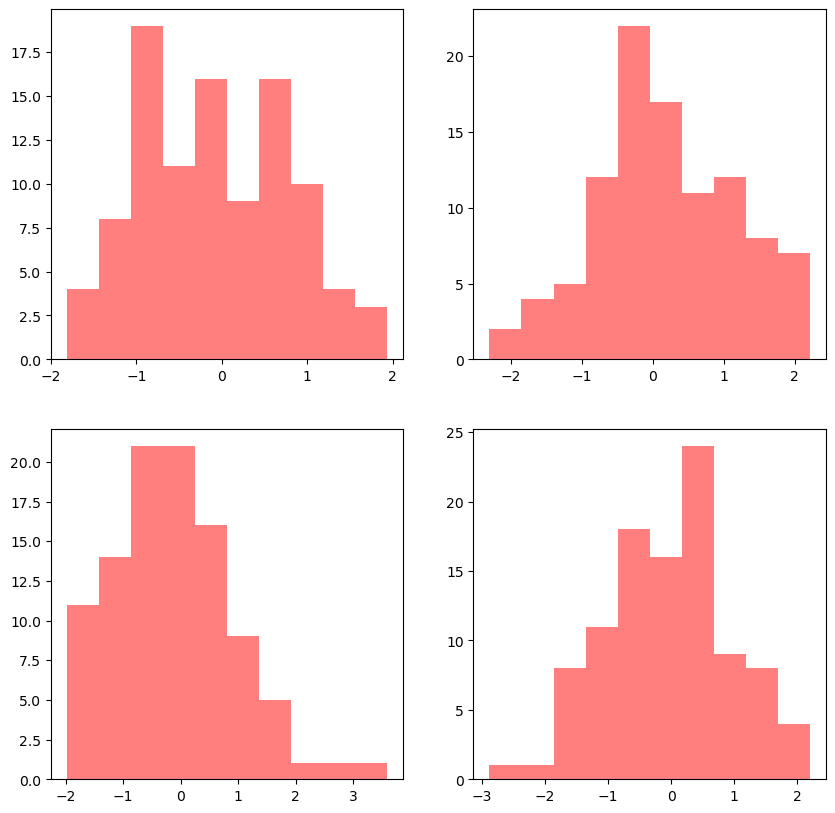

In [33]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Generate random dataset for each subplot
for i in range(2):
    for j in range(2):
        data = np.random.randn(100)
        axs[i, j].hist(data, color='red', alpha=0.5)
        
# Apply a fancy colormap to the figure
cmap = plt.get_cmap('hot')
plt.set_cmap(cmap)

# Show the figure
plt.show()